In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:

df = pd.read_csv('DSBDALExam DataSets/Iris/ir.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [17]:
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)


In [18]:

df.replace('?', np.nan, inplace=True)


# Drop missing values
df.dropna(inplace=True)

In [19]:
for col in df.columns[:-1]:
    df = df[df[col] >= 0]

print(f"Dataset shape after cleaning: {df.shape}")


Dataset shape after cleaning: (150, 5)


In [20]:

Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (df.iloc[:, :-1] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Dataset shape after removing outliers: {df.shape}")

Dataset shape after removing outliers: (146, 5)


In [21]:

X = df.drop('variety', axis=1)
y = df['variety']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [22]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

In [26]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)


In [24]:
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"Naive Bayes Accuracy: {acc_nb:.2f}")


Logistic Regression Accuracy: 0.95
Naive Bayes Accuracy: 0.95


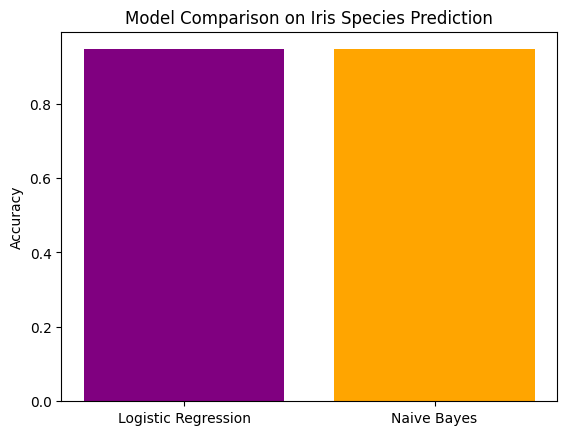

In [25]:
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [acc_lr, acc_nb]

plt.bar(models, accuracies, color=['purple', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Comparison on Iris Species Prediction')
plt.show()